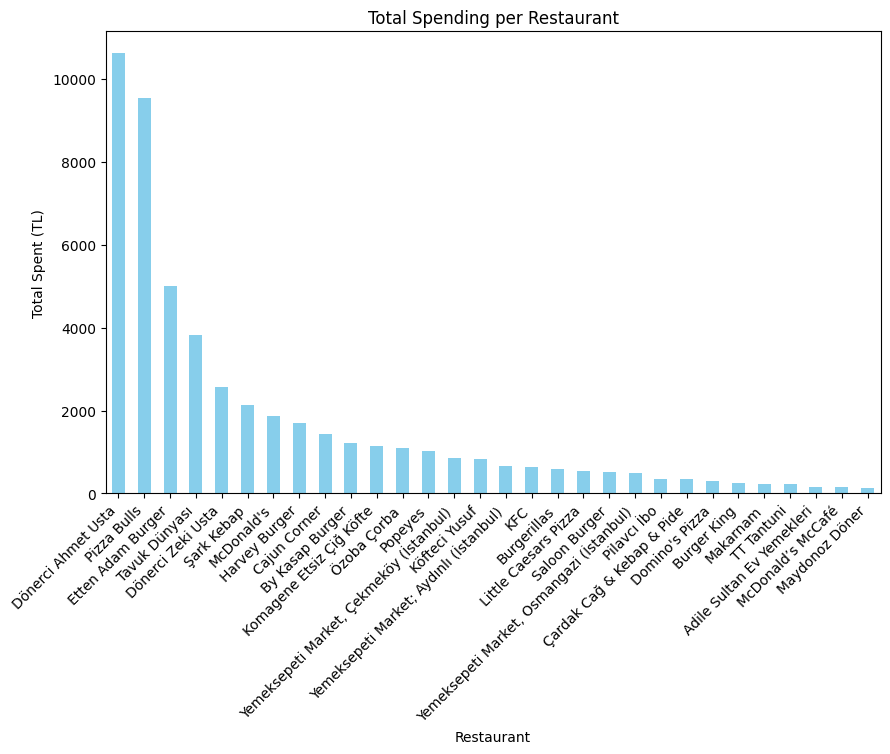

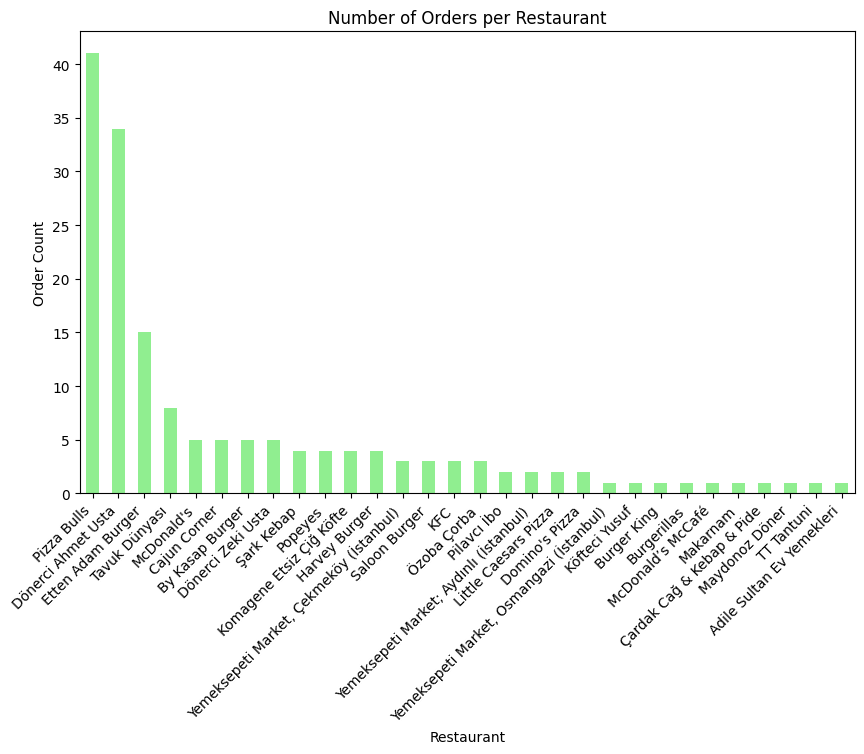

Total Orders: 164
Total Spent: 50414.61 TL
Average Price per Order: 307.41 TL

Most Frequently Ordered Items:
menu_detail
1x Et Döner Dürüm                                  21
1x Orta Boy Pizza + Kutu İçecek + Sos              12
1x Et Döner Dürüm,                                  7
1x Orta Boy Pizza + Kutu İçecek + Sufle + Sos       7
1x Ottoman Burger,                                  5
1x Coca-Cola Fırsatı 3                              4
1x Cheeseburger Menü,                               4
1x Orta Boy Pizza + Kutu İçecek + Patates + Sos     4
1x Şefin Tavası,                                    3
1x Orta Boy Pizza + İçecek + Sos (1+1)              3
Name: count, dtype: int64


In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import json

# Upload the JSON file manually in Colab or specify the file path
file_path = "yemeksepeti_orders_listing.json"

# Load the JSON data into a pandas DataFrame
with open(file_path, "r", encoding="utf-8") as file:
    orders_data = json.load(file)

df = pd.DataFrame(orders_data)

# Convert price_info to numeric after removing currency symbols
# Convert price_info to numeric after cleaning up symbols and formats
df['price_numeric'] = (
    df['price_info']
    .str.replace(" TL", "", regex=False)  # Remove " TL"
    .str.replace(".", "", regex=False)   # Remove thousand separators
    .str.replace(",", ".", regex=False)  # Convert comma to dot for decimals
    .astype(float)  # Convert to float
)


# Visualization 1: Total spending per restaurant
total_spending = df.groupby('restaurant_name')['price_numeric'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='skyblue')
plt.title("Total Spending per Restaurant")
plt.ylabel("Total Spent (TL)")
plt.xlabel("Restaurant")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 2: Number of orders per restaurant
order_counts = df['restaurant_name'].value_counts()

plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar', color='lightgreen')
plt.title("Number of Orders per Restaurant")
plt.ylabel("Order Count")
plt.xlabel("Restaurant")
plt.xticks(rotation=45, ha='right')
plt.show()

# Summaries
total_orders = len(df)
total_spent = df['price_numeric'].sum()
avg_price_per_order = df['price_numeric'].mean()

print(f"Total Orders: {total_orders}")
print(f"Total Spent: {total_spent:.2f} TL")
print(f"Average Price per Order: {avg_price_per_order:.2f} TL")

# Extract most frequently ordered menu details
most_frequent_items = df['menu_detail'].value_counts().head(10)
print("\nMost Frequently Ordered Items:")
print(most_frequent_items)

# Save summaries to a text file
with open("order_summaries.txt", "w", encoding="utf-8") as summary_file:
    summary_file.write(f"Total Orders: {total_orders}\n")
    summary_file.write(f"Total Spent: {total_spent:.2f} TL\n")
    summary_file.write(f"Average Price per Order: {avg_price_per_order:.2f} TL\n")
    summary_file.write("\nMost Frequently Ordered Items:\n")
    summary_file.write(most_frequent_items.to_string())


Columns in DataFrame: Index(['order_id', 'list_page_text', 'teslim_tarihi', 'menu_detail',
       'restaurant_name', 'price_info'],
      dtype='object')
First few rows of data:          order_id                                     list_page_text  \
0  zt1p-2501-arl9  Tavuk Dünyası\n31 Ara Sal 15:14 tarihinde tesl...   
1       wu7h-ih4i  Yemeksepeti Market, Osmangazi (İstanbul)\n28 A...   
2       hc1d-rzkc  İptal Edildi\nYemeksepeti Market; Aydınlı (İst...   
3       c2rr-ftjk  Şark Kebap\n27 Ara Cum 17:02 tarihinde teslim ...   
4       s5p1-qn9q  Pilavcı İbo\n25 Ara Çar 19:08 tarihinde teslim...   

                              teslim_tarihi  \
0  31 Ara Sal 15:14 tarihinde teslim edildi   
1  28 Ara Cmt 21:23 tarihinde teslim edildi   
2   28 Ara Cmt 21:24 tarihinde iptal edildi   
3  27 Ara Cum 17:02 tarihinde teslim edildi   
4  25 Ara Çar 19:08 tarihinde teslim edildi   

                                        menu_detail  \
0                              1x Lezzette Tek Menü

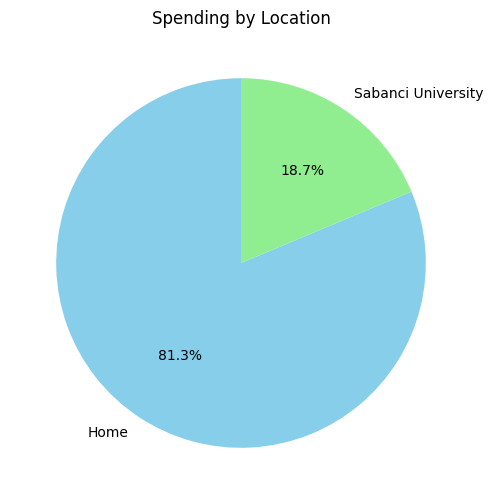

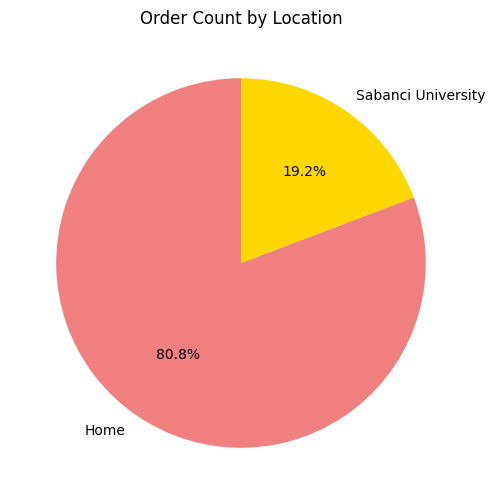

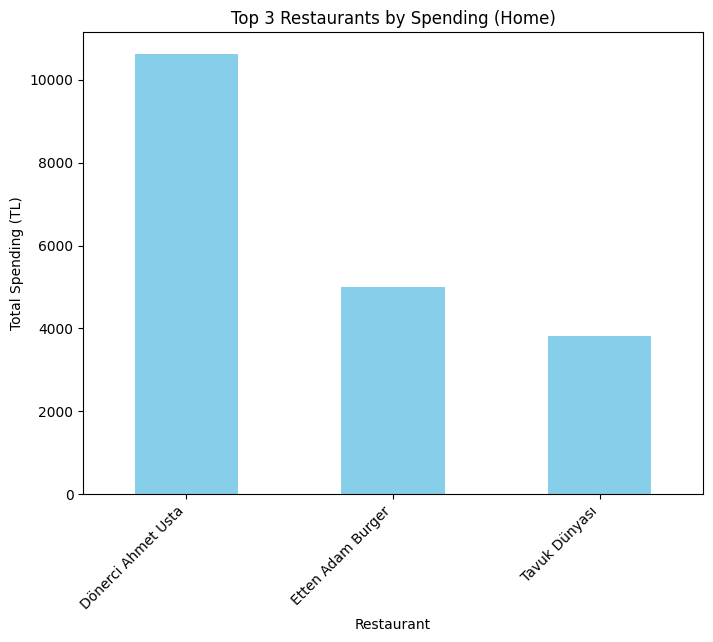

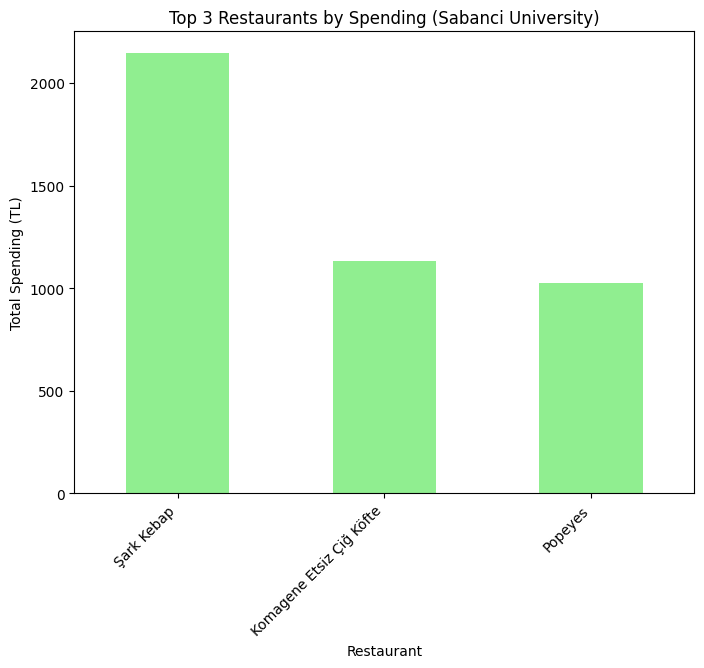

Total Spending by Location:
location
Home                  28767.92
Sabanci University     6609.98
Name: price_numeric, dtype: float64

Order Count by Location:
location
Home                  84
Sabanci University    20
Name: count, dtype: int64

Top 3 Restaurants by Spending (Home):
restaurant_name
Dönerci Ahmet Usta    10616.05
Etten Adam Burger      5001.99
Tavuk Dünyası          3821.98
Name: price_numeric, dtype: float64

Top 3 Restaurants by Spending (Sabanci University):
restaurant_name
Şark Kebap                  2144.0
Komagene Etsiz Çiğ Köfte    1134.5
Popeyes                     1027.0
Name: price_numeric, dtype: float64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load JSON file
file_path = "yemeksepeti_orders_listing.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame from JSON
df = pd.DataFrame(data)

# Debugging: Inspect the columns
print("Columns in DataFrame:", df.columns)
print("First few rows of data:", df.head())

# Use 'price_info' to extract and clean price data
df['price_numeric'] = (
    df['price_info']
    .str.replace(" TL", "", regex=False)  # Remove " TL"
    .str.replace(".", "", regex=False)   # Remove thousand separators
    .str.replace(",", ".", regex=False)  # Convert comma to dot for decimals
    .astype(float)  # Convert to float
)

# Add location data based on your input
location_mapping = {
    "Dönerci Ahmet Usta": "Home",
    "Pizza Buls": "Sabanci University",
    "Etten Adam Burger": "Home",
    "Tavuk Dünyası": "Home",
    "Dönerci Zeki Usta": "Home",
    "Şark Kebap": "Sabanci University",
    "McDonalds": "Sabanci University",
    "Harvey Burger": "Home",
    "Cajun Corner": "Home",
    "By Kasap Burger": "Home",
    "Komagene Etsiz Çiğ Köfte": "Sabanci University",
    "Özoba Çorba": "Home",
    "Popeyes": "Sabanci University",
    "Köfteci Yusuf": "Sabanci University",
    "KFC": "Sabanci University",
    "Burgerillas": "Home",
    "Little Caesars": "Sabanci University",
    "Saloon Burger": "Home",
    "Pilavcı İbo": "Sabanci University",
    "Çardak Çağ Kebap Pida": "Sabanci University",
    "Dominos Pizza": "Sabanci University",
    "Burger King": "Sabanci University",
    "Makarnam": "Home",
    "TT Tantuni": "Sabanci University",
    "Adile Sultan": "Sabanci University",
    "McDonalds Mc Cafe": "Sabanci University",
    "Maydanoz Döner": "Home",
}

df["location"] = df["restaurant_name"].map(location_mapping)

# Spending by location
spending_by_location = df.groupby("location")["price_numeric"].sum()

# Order count by location
order_count_by_location = df["location"].value_counts()

# Debugging: Check spending and order counts by location
print("Spending by location:", spending_by_location)
print("Order counts by location:", order_count_by_location)

# Top 3 restaurants by spending
top_3_home = df[df["location"] == "Home"].groupby("restaurant_name")["price_numeric"].sum().nlargest(3)
top_3_sabanci = df[df["location"] == "Sabanci University"].groupby("restaurant_name")["price_numeric"].sum().nlargest(3)

# Plot spending by location as a pie chart
plt.figure(figsize=(6, 6))
spending_by_location.plot.pie(autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightgreen"])
plt.title("Spending by Location")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

# Plot order count by location as a pie chart
plt.figure(figsize=(6, 6))
order_count_by_location.plot.pie(autopct="%1.1f%%", startangle=90, colors=["lightcoral", "gold"])
plt.title("Order Count by Location")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

# Plot top 3 restaurants for "Home" as a bar chart
plt.figure(figsize=(8, 6))
top_3_home.plot(kind="bar", color="skyblue")
plt.title("Top 3 Restaurants by Spending (Home)")
plt.ylabel("Total Spending (TL)")
plt.xlabel("Restaurant")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot top 3 restaurants for "Sabanci University" as a bar chart
plt.figure(figsize=(8, 6))
top_3_sabanci.plot(kind="bar", color="lightgreen")
plt.title("Top 3 Restaurants by Spending (Sabanci University)")
plt.ylabel("Total Spending (TL)")
plt.xlabel("Restaurant")
plt.xticks(rotation=45, ha="right")
plt.show()

# Print summaries
print("Total Spending by Location:")
print(spending_by_location)

print("\nOrder Count by Location:")
print(order_count_by_location)

print("\nTop 3 Restaurants by Spending (Home):")
print(top_3_home)

print("\nTop 3 Restaurants by Spending (Sabanci University):")
print(top_3_sabanci)


Columns in DataFrame: Index(['order_id', 'list_page_text', 'teslim_tarihi', 'menu_detail',
       'restaurant_name', 'price_info'],
      dtype='object')
First few rows of data:          order_id                                     list_page_text  \
0  zt1p-2501-arl9  Tavuk Dünyası\n31 Ara Sal 15:14 tarihinde tesl...   
1       wu7h-ih4i  Yemeksepeti Market, Osmangazi (İstanbul)\n28 A...   
2       hc1d-rzkc  İptal Edildi\nYemeksepeti Market; Aydınlı (İst...   
3       c2rr-ftjk  Şark Kebap\n27 Ara Cum 17:02 tarihinde teslim ...   
4       s5p1-qn9q  Pilavcı İbo\n25 Ara Çar 19:08 tarihinde teslim...   

                              teslim_tarihi  \
0  31 Ara Sal 15:14 tarihinde teslim edildi   
1  28 Ara Cmt 21:23 tarihinde teslim edildi   
2   28 Ara Cmt 21:24 tarihinde iptal edildi   
3  27 Ara Cum 17:02 tarihinde teslim edildi   
4  25 Ara Çar 19:08 tarihinde teslim edildi   

                                        menu_detail  \
0                              1x Lezzette Tek Menü

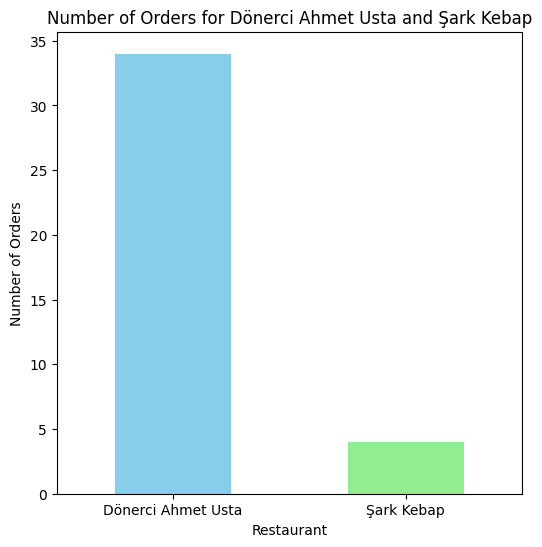

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load JSON file
file_path = "yemeksepeti_orders_listing.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame from JSON
df = pd.DataFrame(data)

# Debugging: Inspect the columns
print("Columns in DataFrame:", df.columns)
print("First few rows of data:", df.head())

# Use 'price_info' to extract and clean price data
df['price_numeric'] = (
    df['price_info']
    .str.replace(" TL", "", regex=False)  # Remove " TL"
    .str.replace(".", "", regex=False)   # Remove thousand separators
    .str.replace(",", ".", regex=False)  # Convert comma to dot for decimals
    .astype(float)  # Convert to float
)

# Add location data based on your input

df["location"] = df["restaurant_name"].map(location_mapping)

# Extract orders for Dönerci Ahmet Usta and Şark Kebap
donerci_ahmet_usta_orders = df[df["restaurant_name"] == "Dönerci Ahmet Usta"]["menu_detail"].tolist()
sark_kebap_orders = df[df["restaurant_name"] == "Şark Kebap"]["menu_detail"].tolist()

# Number of orders for each place
order_counts = df["restaurant_name"].value_counts()[["Dönerci Ahmet Usta", "Şark Kebap"]]

# Debugging: Check orders and counts
print("Items ordered from Dönerci Ahmet Usta:")
print(donerci_ahmet_usta_orders)

print("\nItems ordered from Şark Kebap:")
print(sark_kebap_orders)

print("\nNumber of orders for Dönerci Ahmet Usta and Şark Kebap:")
print(order_counts)

# Plot the number of orders as a bar chart
plt.figure(figsize=(6, 6))
order_counts.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Number of Orders for Dönerci Ahmet Usta and Şark Kebap")
plt.ylabel("Number of Orders")
plt.xlabel("Restaurant")
plt.xticks(rotation=0)
plt.show()


Columns in DataFrame: Index(['order_id', 'list_page_text', 'teslim_tarihi', 'menu_detail',
       'restaurant_name', 'price_info'],
      dtype='object')
First few rows of data:          order_id                                     list_page_text  \
0  zt1p-2501-arl9  Tavuk Dünyası\n31 Ara Sal 15:14 tarihinde tesl...   
1       wu7h-ih4i  Yemeksepeti Market, Osmangazi (İstanbul)\n28 A...   
2       hc1d-rzkc  İptal Edildi\nYemeksepeti Market; Aydınlı (İst...   
3       c2rr-ftjk  Şark Kebap\n27 Ara Cum 17:02 tarihinde teslim ...   
4       s5p1-qn9q  Pilavcı İbo\n25 Ara Çar 19:08 tarihinde teslim...   

                              teslim_tarihi  \
0  31 Ara Sal 15:14 tarihinde teslim edildi   
1  28 Ara Cmt 21:23 tarihinde teslim edildi   
2   28 Ara Cmt 21:24 tarihinde iptal edildi   
3  27 Ara Cum 17:02 tarihinde teslim edildi   
4  25 Ara Çar 19:08 tarihinde teslim edildi   

                                        menu_detail  \
0                              1x Lezzette Tek Menü

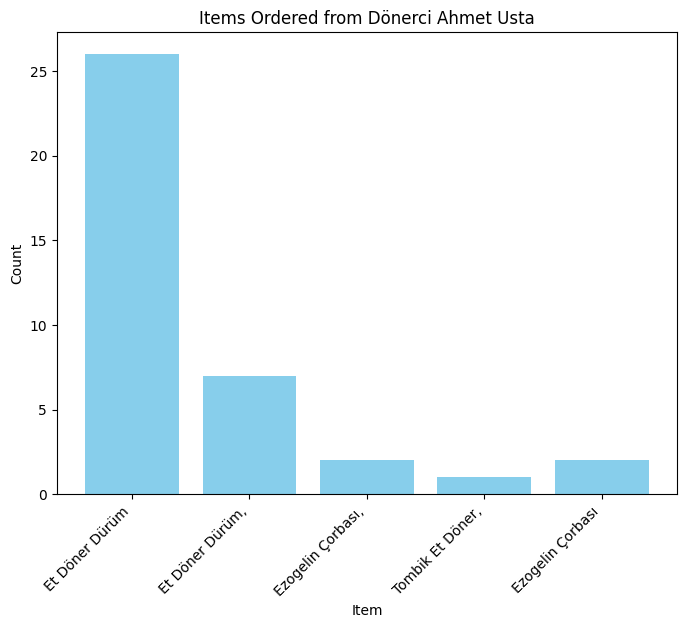

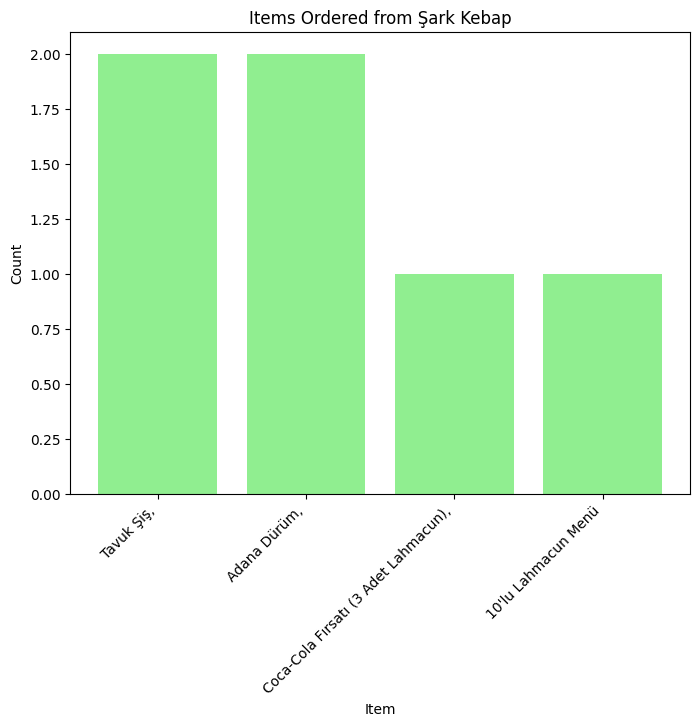

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter

# Load JSON file
file_path = "yemeksepeti_orders_listing.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame from JSON
df = pd.DataFrame(data)

# Debugging: Inspect the columns
print("Columns in DataFrame:", df.columns)
print("First few rows of data:", df.head())

# Aggregate menu items for each restaurant
def aggregate_items(orders):
    """Aggregate items and their counts from menu details."""
    counter = Counter()
    for order in orders:
        items = order.split(", ")
        for item in items:
            count, name = item.split("x ", 1)
            counter[name] += int(count.strip())
    return counter

# Extract menu details for Dönerci Ahmet Usta and Şark Kebap
donerci_ahmet_usta_orders = df[df["restaurant_name"] == "Dönerci Ahmet Usta"]["menu_detail"].tolist()
sark_kebap_orders = df[df["restaurant_name"] == "Şark Kebap"]["menu_detail"].tolist()

# Aggregate items
donerci_ahmet_usta_items = aggregate_items(donerci_ahmet_usta_orders)
sark_kebap_items = aggregate_items(sark_kebap_orders)

# Convert to DataFrames for easy plotting
donerci_ahmet_usta_df = pd.DataFrame(list(donerci_ahmet_usta_items.items()), columns=["Item", "Count"])
sark_kebap_df = pd.DataFrame(list(sark_kebap_items.items()), columns=["Item", "Count"])

# Debugging: Print aggregated items
print("\nItems ordered from Dönerci Ahmet Usta:")
print(donerci_ahmet_usta_df)

print("\nItems ordered from Şark Kebap:")
print(sark_kebap_df)

# Plot chart for Dönerci Ahmet Usta
plt.figure(figsize=(8, 6))
plt.bar(donerci_ahmet_usta_df["Item"], donerci_ahmet_usta_df["Count"], color="skyblue")
plt.title("Items Ordered from Dönerci Ahmet Usta")
plt.ylabel("Count")
plt.xlabel("Item")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot chart for Şark Kebap
plt.figure(figsize=(8, 6))
plt.bar(sark_kebap_df["Item"], sark_kebap_df["Count"], color="lightgreen")
plt.title("Items Ordered from Şark Kebap")
plt.ylabel("Count")
plt.xlabel("Item")
plt.xticks(rotation=45, ha="right")
plt.show()


                              teslim_tarihi  hour time_of_day
0  31 Ara Sal 15:14 tarihinde teslim edildi    15   afternoon
1  28 Ara Cmt 21:23 tarihinde teslim edildi    21     evening
2   28 Ara Cmt 21:24 tarihinde iptal edildi    21     evening
3  27 Ara Cum 17:02 tarihinde teslim edildi    17     evening
4  25 Ara Çar 19:08 tarihinde teslim edildi    19     evening


<ipython-input-27-afc69cdcdfa3>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='time_of_day', palette='viridis', order=['morning', 'afternoon', 'evening', 'late_night'])


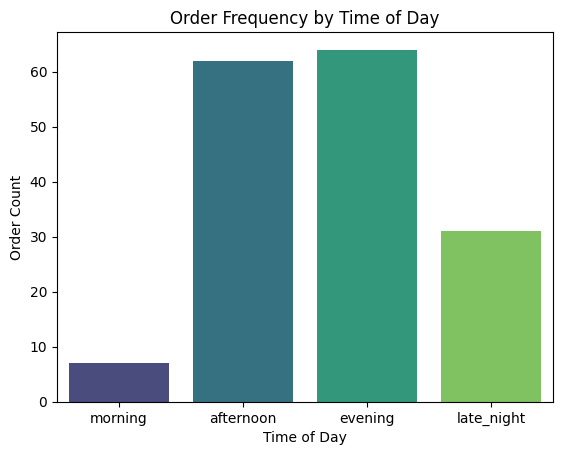

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import json

# Load JSON file
file_path = "yemeksepeti_orders_listing.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame
df = pd.DataFrame(data)

# Ensure 'teslim_tarihi' column exists
if 'teslim_tarihi' not in df.columns:
    raise ValueError("'teslim_tarihi' column not found in the dataset.")

# Function to extract hour from 'teslim_tarihi'
def extract_hour_from_teslim_tarihi(teslim_tarihi):
    match = re.search(r'(\d{1,2}):\d{2}', teslim_tarihi)
    if match:
        return int(match.group(1))  # Extract and convert the hour to integer
    return None

# Categorize the time into periods
def categorize_time_of_day(hour):
    if hour is None:
        return 'unknown'
    elif 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 22:
        return 'evening'
    else:
        return 'late_night'

# Extract the hour and categorize it
df['hour'] = df['teslim_tarihi'].apply(extract_hour_from_teslim_tarihi)
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Debugging: Verify the results
print(df[['teslim_tarihi', 'hour', 'time_of_day']].head())

# Plot order frequency by time of day
sns.countplot(data=df, x='time_of_day', palette='viridis', order=['morning', 'afternoon', 'evening', 'late_night'])
plt.title("Order Frequency by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Order Count")
plt.show()


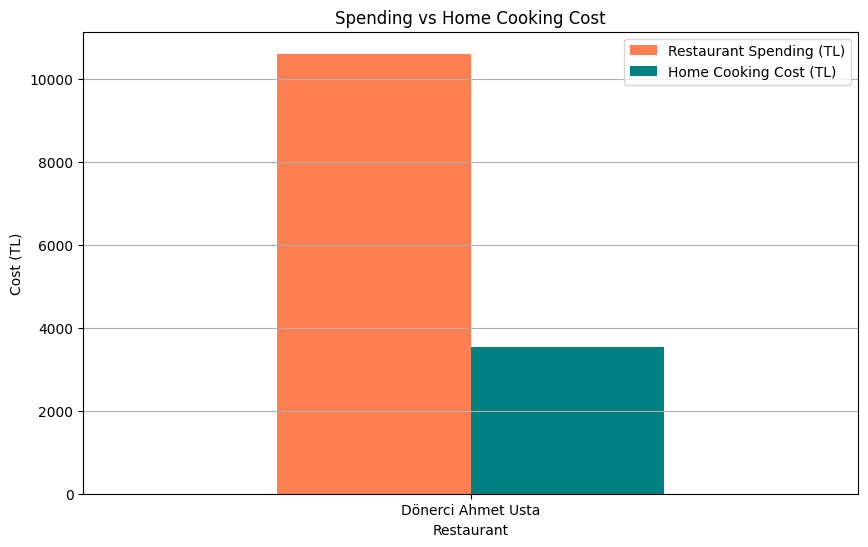

                    Restaurant Spending (TL)  Home Cooking Cost (TL)  \
restaurant_name                                                        
Dönerci Ahmet Usta                  10616.05             3538.683333   

                    Savings (TL)  
restaurant_name                   
Dönerci Ahmet Usta   7077.366667  


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume the data has already been loaded into the DataFrame `df`

# Filter data for Dönerci Ahmet Usta and Pizza Buls
restaurants = ["Dönerci Ahmet Usta"]
restaurant_data = df[df['restaurant_name'].isin(restaurants)]

# Calculate total spending for each restaurant
total_spent = restaurant_data.groupby('restaurant_name')['price_info'].apply(
    lambda x: x.str.replace(" TL", "").str.replace(",", ".").astype(float).sum()
)

# Assumptions:
# - Döner: 1 serving = 300 TL in restaurant; 100g = 75 TL at home

home_cost_per_serving = {
    "Dönerci Ahmet Usta": 300 / 3,  # Cost for equivalent home-cooked 300g döner
}

# Calculate the home cooking cost for the equivalent servings
home_cost = total_spent.index.map(lambda r: (total_spent[r] / 300) * home_cost_per_serving[r])

# Calculate savings
savings = total_spent - home_cost

# Convert to DataFrame for easy plotting
comparison_df = pd.DataFrame({
    "Restaurant Spending (TL)": total_spent,
    "Home Cooking Cost (TL)": home_cost,
    "Savings (TL)": savings
})

# Plot: Spending vs Home Cooking Cost
comparison_df[["Restaurant Spending (TL)", "Home Cooking Cost (TL)"]].plot(
    kind="bar", figsize=(10, 6), color=["coral", "teal"], rot=0
)
plt.title("Spending vs Home Cooking Cost")
plt.ylabel("Cost (TL)")
plt.xlabel("Restaurant")
plt.grid(axis="y")
plt.show()

print(comparison_df)
